<a href="https://colab.research.google.com/github/Jaksta1/Uczenie_Maszynowe_2025/blob/main/Jakub_Kownacki_praca_domowa_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------------------
#1. Importowanie bibliotek i ustawienie odpowiednich wersji
---------------------------------------

Poniższą linijkę należy uruchomić, po czym wejść w Środowisko wykonawcze -> Uruchom ponownie sesję. Wtedy należy wykonać resztę kodu **pomijając linijkę** "!pip install ....".

In [ ]:
!pip install --upgrade --quiet gensim==4.3.0 scikit-learn==1.4.1.post1 numpy==1.24.4 matplotlib==3.7.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 79.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
pymc 5.23.0 require

In [ ]:
# Krok 1: Import wymaganych bibliotek
import gensim.downloader as api
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm


----------------------------------------
#2. Definiujemy słownik 100 słów
----------------------------------------

In [ ]:
# Krok 2: Definicja 10 klas semantycznych (100 unikalnych słów)
semantic_classes = {
    "Gender": [
        ("king", "queen"),
        ("man", "woman"),
        ("doctor", "nurse"),
        ("prince", "princess"),
        ("boy", "girl")
    ],
    "Verb_Tense_Past": [
        ("run", "ran"),
        ("swim", "swam"),
        ("bring", "brought"),
        ("get", "got"),
        ("like", "liked")
    ],
    "Singular_Plural": [
        ("mouse", "mice"),
        ("child", "children"),
        ("foot", "feet"),
        ("tooth", "teeth"),
        ("person", "people"),
    ],
    "Country_Capital": [
        ("Austria", "Vienna"),
        ("Sweden", "Stockholm"),
        ("Portugal", "Lisbon"),
        ("Finland", "Helsinki"),
        ("Denmark", "Copenhagen"),
    ],
    "Comparative": [
        ("tall", "taller"),
        ("strong", "stronger"),
        ("fast", "faster"),
        ("smart", "smarter"),
        ("deep", "deeper"),
    ],
    "Tool_User": [
        ("scalpel", "surgeon"),
        ("telescope", "astronomer"),
        ("microscope", "biologist"),
        ("chisel", "sculptor"),
        ("saw", "carpenter"),
    ],
    "Animal_Baby": [
        ("lion", "cub"),
        ("duck", "duckling"),
        ("frog", "tadpole"),
        ("horse", "foal"),
        ("elephant", "calf"),
    ],
    "Antonyms": [
        ("light", "dark"),
        ("hard", "soft"),
        ("clean", "dirty"),
        ("full", "empty"),
        ("early", "late"),
    ],
    "Country_Nationality": [
        ("Brazil", "Brazilian"),
        ("Russia", "Russian"),
        ("China", "Chinese"),
        ("India", "Indian"),
        ("Egypt", "Egyptian"),
    ],
    "Profession_Workspace": [
        ("librarian", "library"),
        ("farmer", "farm"),
        ("baker", "bakery"),
        ("mechanic", "garage"),
        ("scientist", "laboratory"),
    ],
}


# Krok 3: Zbierz wszystkie unikalne (lowercased) słowa
all_words = []
for pairs in semantic_classes.values():
    for w1, w2 in pairs:
        all_words.append(w1.lower())
        all_words.append(w2.lower())

# Usuń ewentualne duplikaty, zachowując kolejność:
all_words = list(dict.fromkeys(all_words))
print(f"► Łączna liczba unikalnych słów: {len(all_words)} (powinno być 100)")

# Krok 4: Załaduj model Word2Vec (Google News 300d)
print("► Ładowanie wstępnie wytrenowanego modelu Word2Vec (Google News)...")
model = api.load('word2vec-google-news-300')
print("► Model wczytany.")

# Krok 5: Podziel słowa na in-vocab / out-of-vocab
oov_words = [w for w in all_words if w not in model]
if oov_words:
    print("⚠️ OOV – słowa nieobecne w słowniku:", oov_words)

# Filtruj tylko te, które są w modelu:
in_vocab_words = [w for w in all_words if w in model]
print(f"► Słów w modelu (in-vocab): {len(in_vocab_words)} / {len(all_words)}")

# Jeśli np. brakuje jakichś słów, możnaby dodać/zmienić parę w semantycznych klasach.
# Dla klarowności tu zakładamy, że wszystkich 100 słów jest w modelu.

► Łączna liczba unikalnych słów: 100 (powinno być 100)
► Ładowanie wstępnie wytrenowanego modelu Word2Vec (Google News)...
► Model wczytany.
► Słów w modelu (in-vocab): 100 / 100


------------------------------------------
#3. Globalne PCA i wykresy wyników
------------------------------------------

<ipython-input-13-b2d175402c29>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap("tab10", len(class_names))  # maks. 10 klas


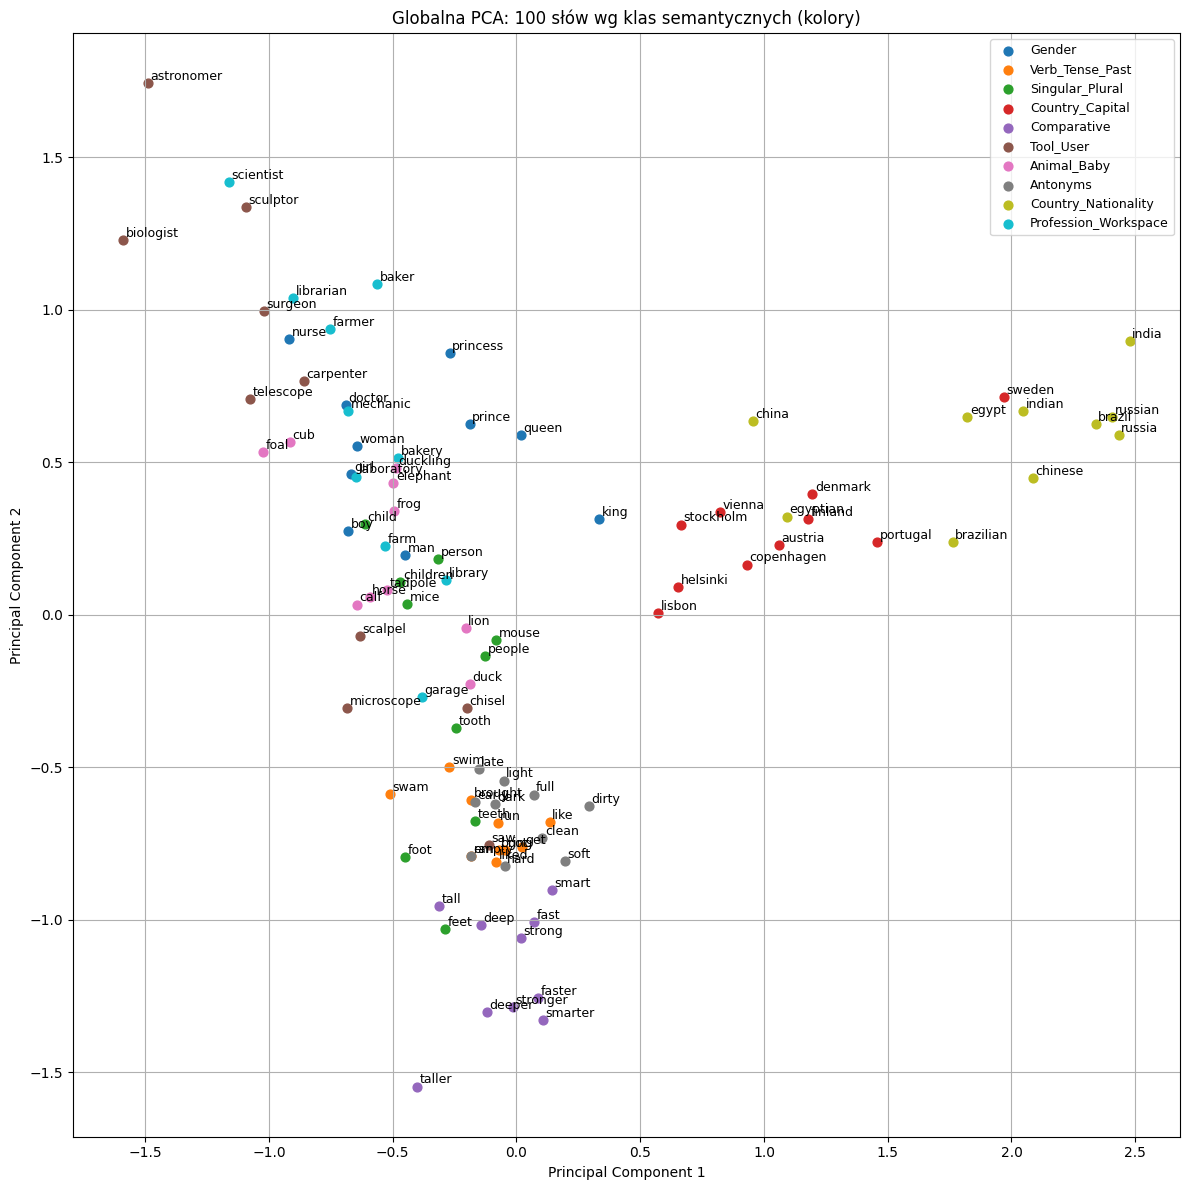

In [ ]:
# Krok 6: Utwórz macierz wektorów dla wszystkich in-vocab słów
word_vectors = np.array([model[w] for w in in_vocab_words])  # shape (N, 300)

# Krok 7: Globalna PCA (na wszystkich in-vocab słowach)
pca_global = PCA(n_components=2)
coords_global = pca_global.fit_transform(word_vectors)  # shape (N, 2)

# Mapowanie: word → (x, y)
global_coords_dict = { word: coords_global[i] for i, word in enumerate(in_vocab_words) }

# Odwrotne mapowanie: słowo → klasa
word_to_class = {}
for i, (class_name, pairs) in enumerate(semantic_classes.items()):
    for a, b in pairs:
        word_to_class[a.lower()] = class_name
        word_to_class[b.lower()] = class_name

# Lista unikalnych klas i przypisanie im kolorów
class_names = list(semantic_classes.keys())
colors = cm.get_cmap("tab10", len(class_names))  # maks. 10 klas

# Krok 8: Rysuj globalny wykres PCA (wszystkie 100 punktów)
plt.figure(figsize=(12, 12))
for word, (x, y) in global_coords_dict.items():
    cls_name = word_to_class.get(word, None)
    if cls_name is not None:
        color_index = class_names.index(cls_name)
        plt.scatter(x, y, color=colors(color_index), s=40, label=cls_name if word == [k for k, v in word_to_class.items() if v == cls_name][0] else "")
        plt.text(x + 0.01, y + 0.01, word, fontsize=9)

# Dodaj legendę bez duplikatów
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
plt.legend(unique.values(), unique.keys(), loc='upper right', fontsize=9)

plt.title("Globalna PCA: 100 słów wg klas semantycznych (kolory)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()



## Komentarz do wykresu
Wykres globalnego PCA przedstawia rzutowanie wektorów słów na dwie główne składowe, co umożliwia wizualną ocenę podobieństw i różnic między klasami. Widać, że niektóre klasy tworzą lepiej odseparowane skupiska np. country_nationality, country_capital, comparative oraz animal_baby, co sugeruje, że model częściowo zachowuje relacje semantyczne. Jednak niektóre klasy takie jak gender, singular_plural, tool_user są rozrzucone i nachodzą na wiele innych klas, co może świadczyć o ograniczeniach redukcji wymiarowości i nakładaniu się znaczeń między słowami.

---------------------------------------------------------
#4. Wykresy globalnego PCA dla każdej klasy
---------------------------------------------------------

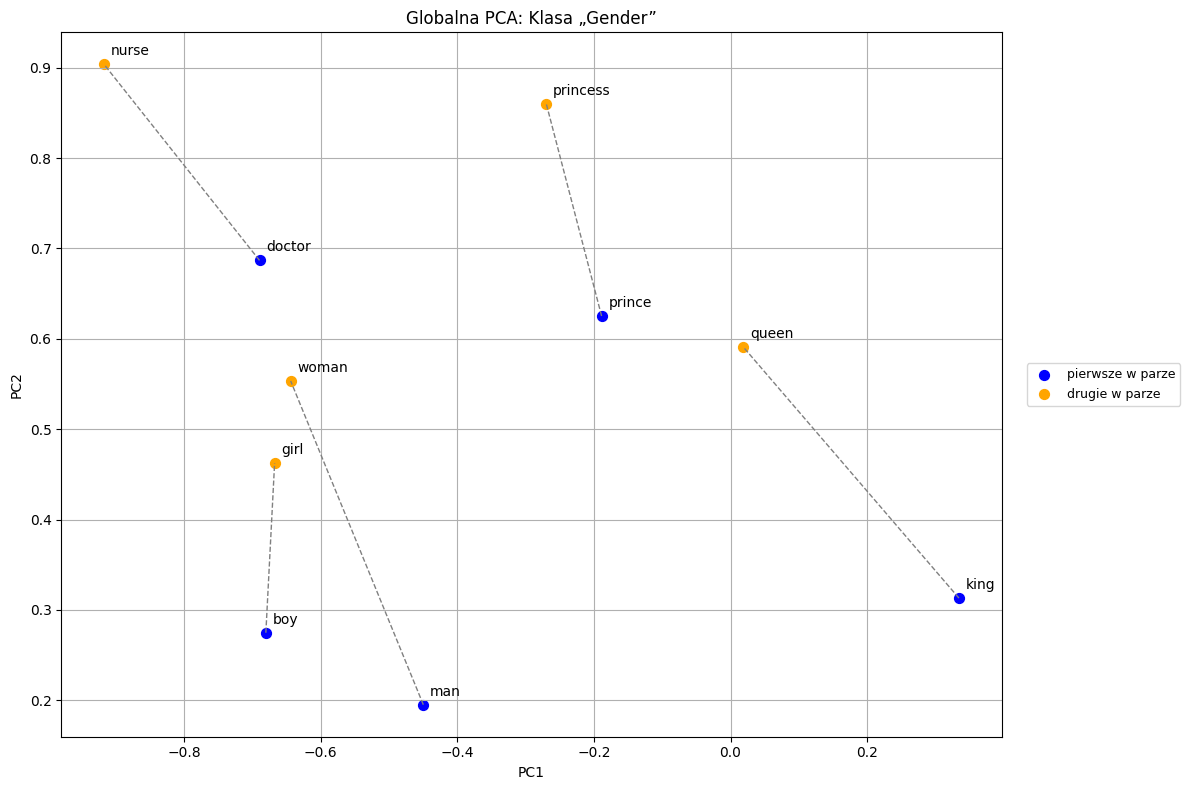

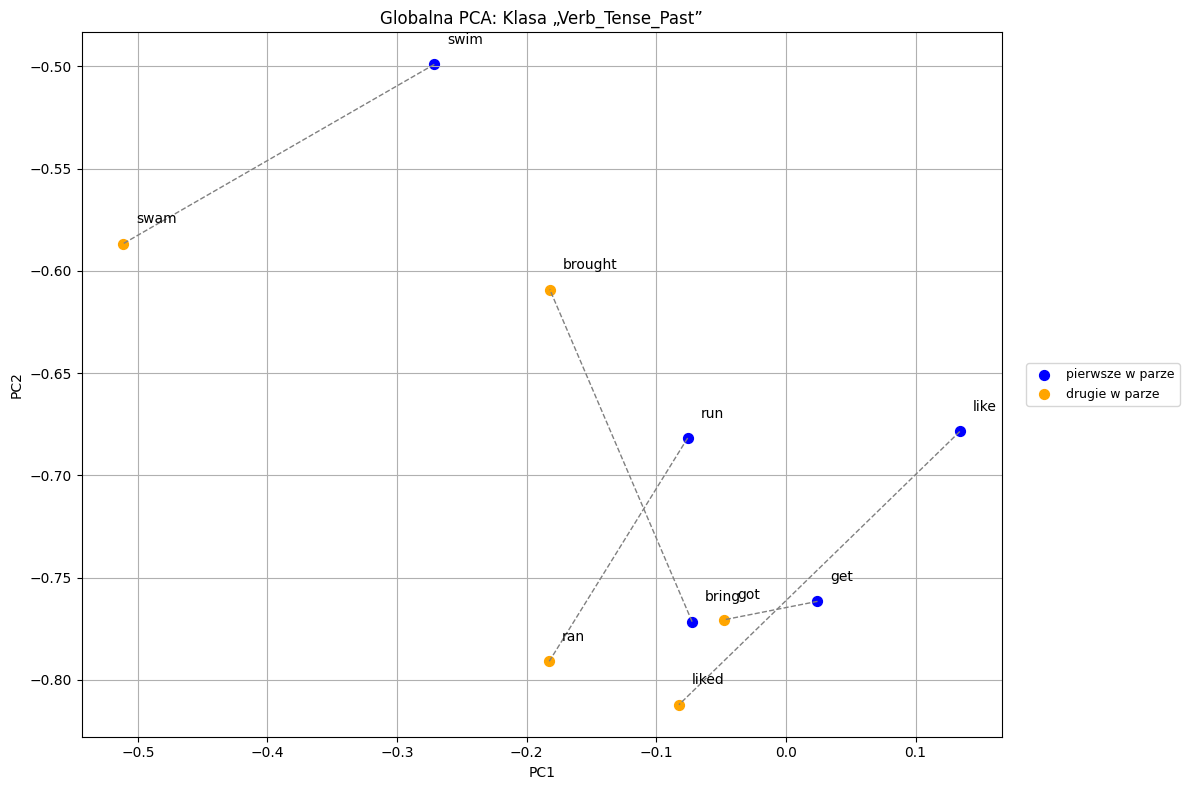

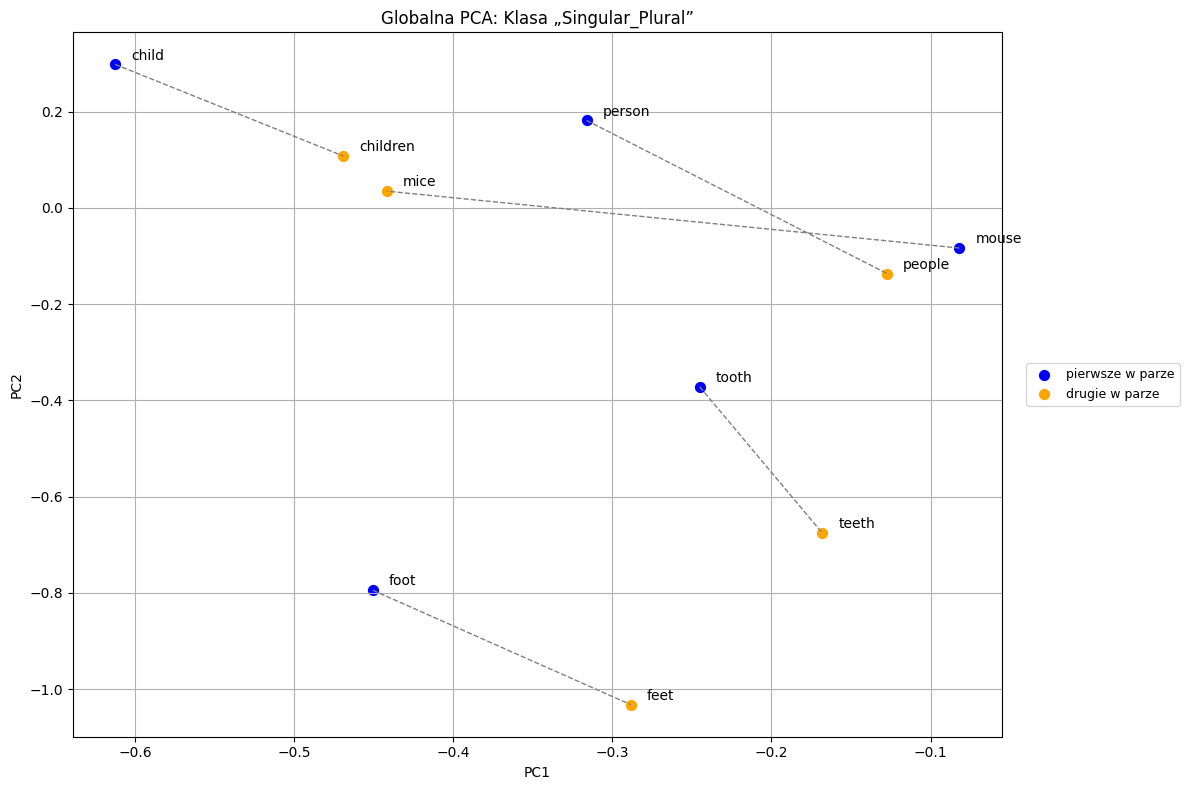

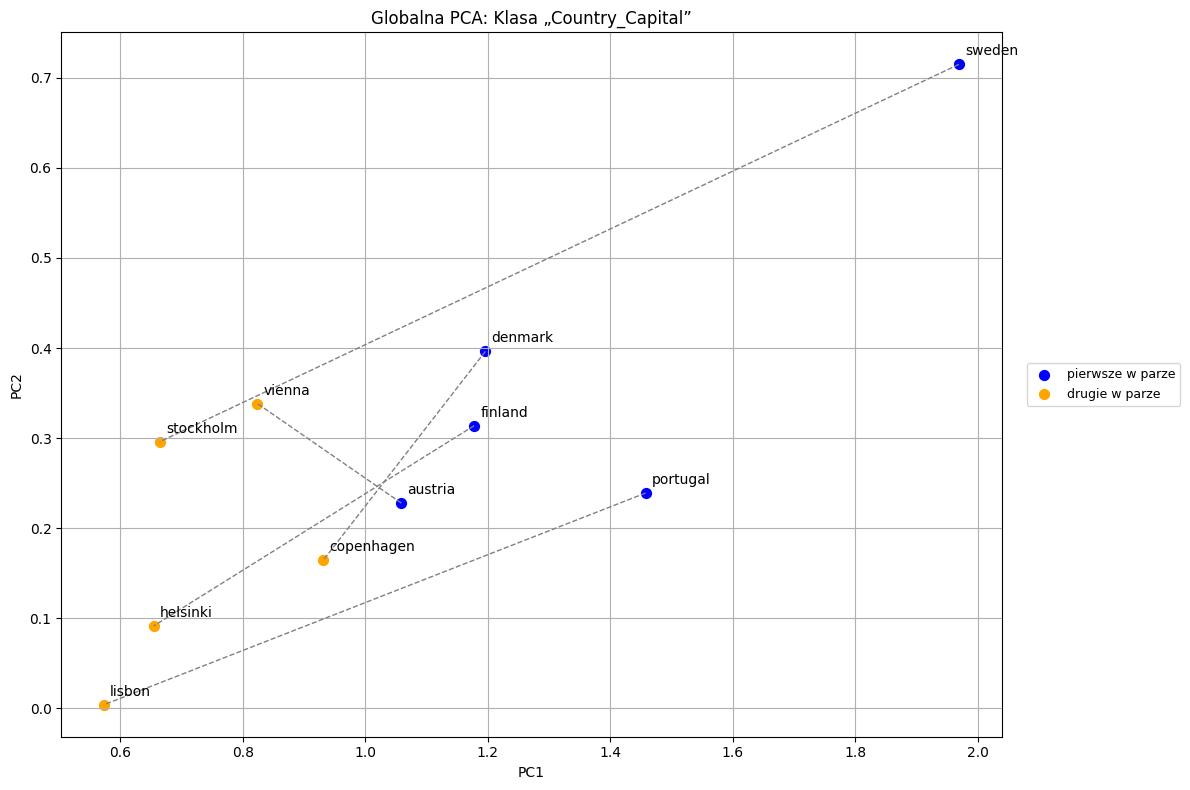

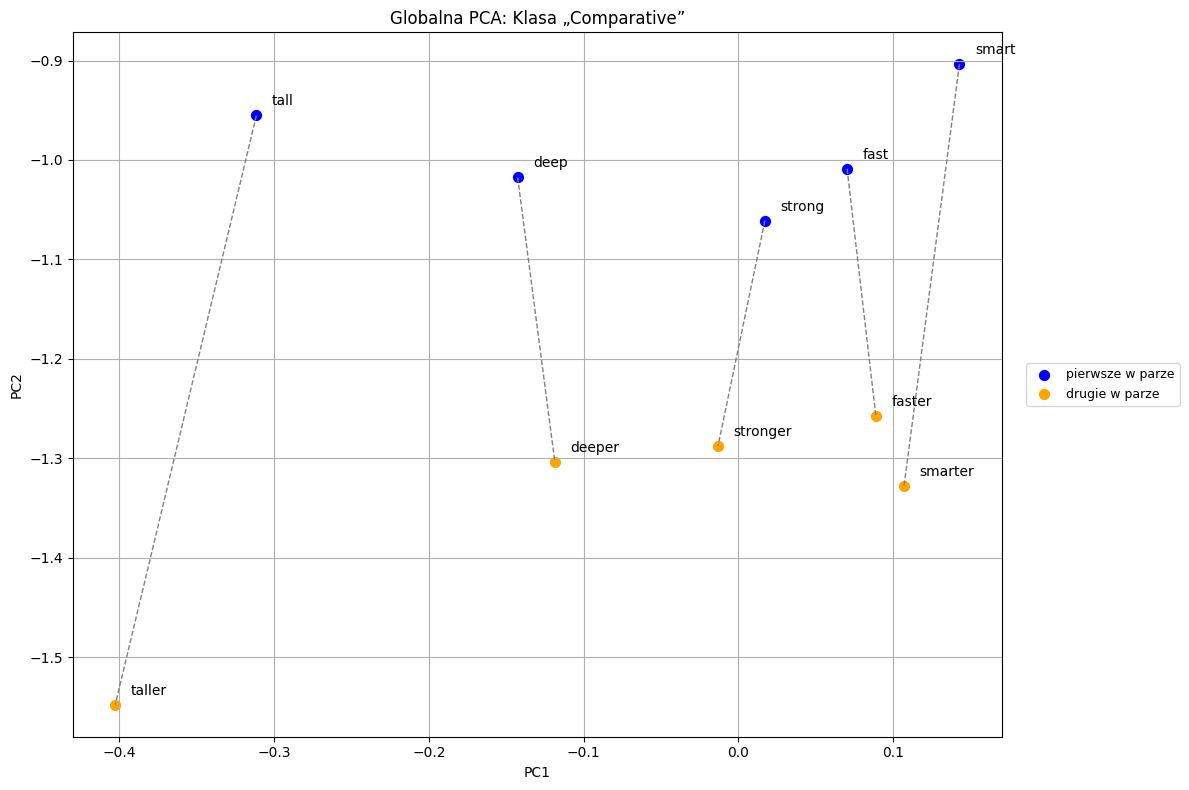

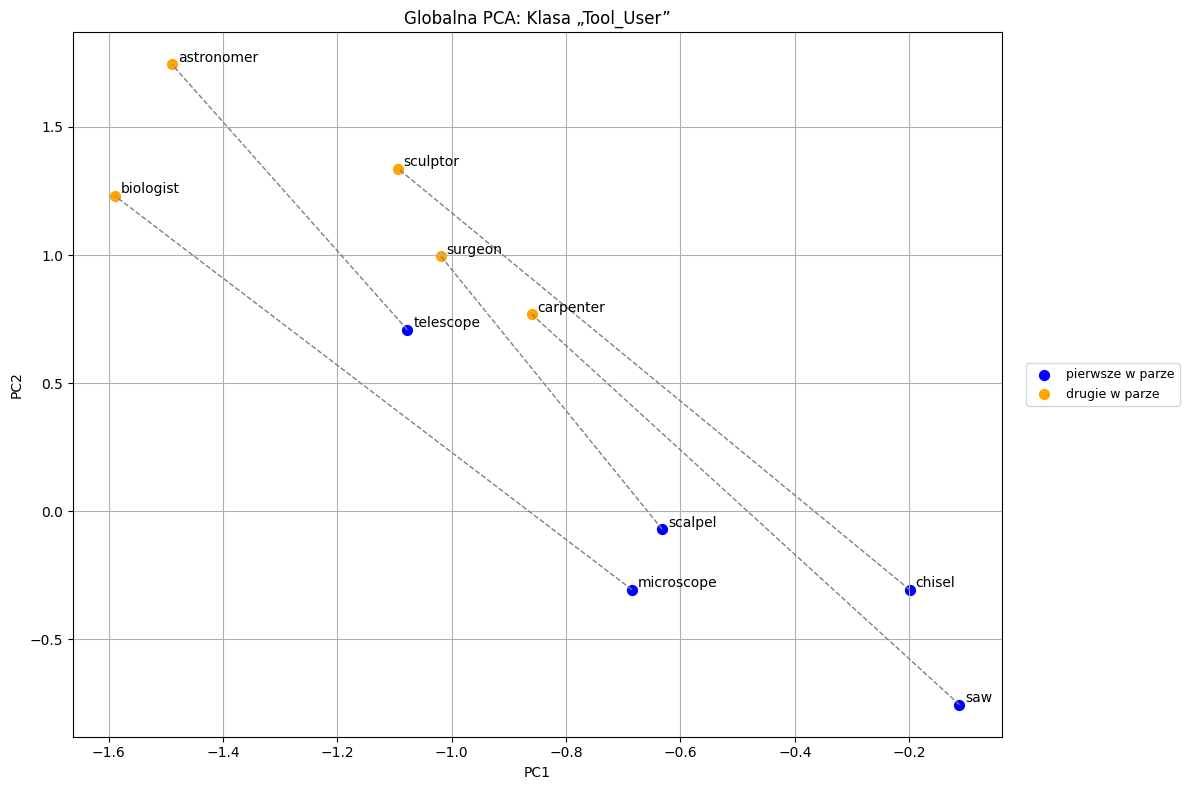

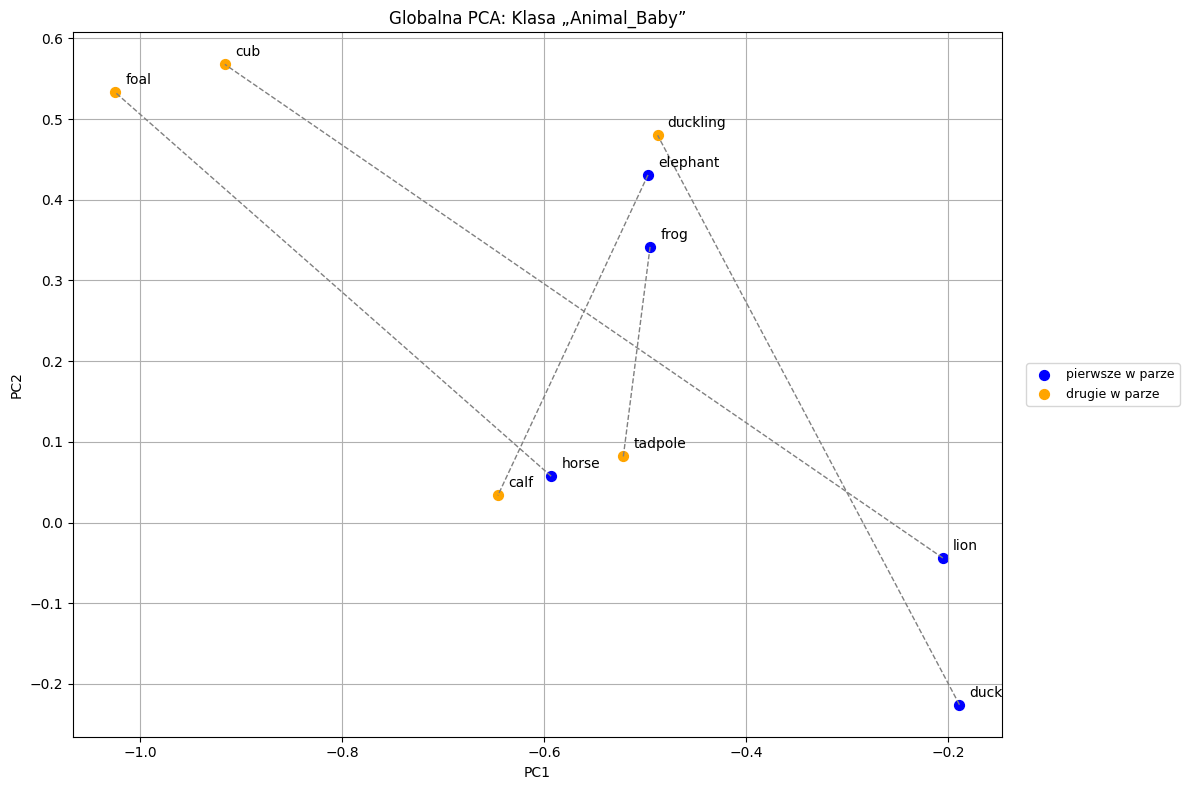

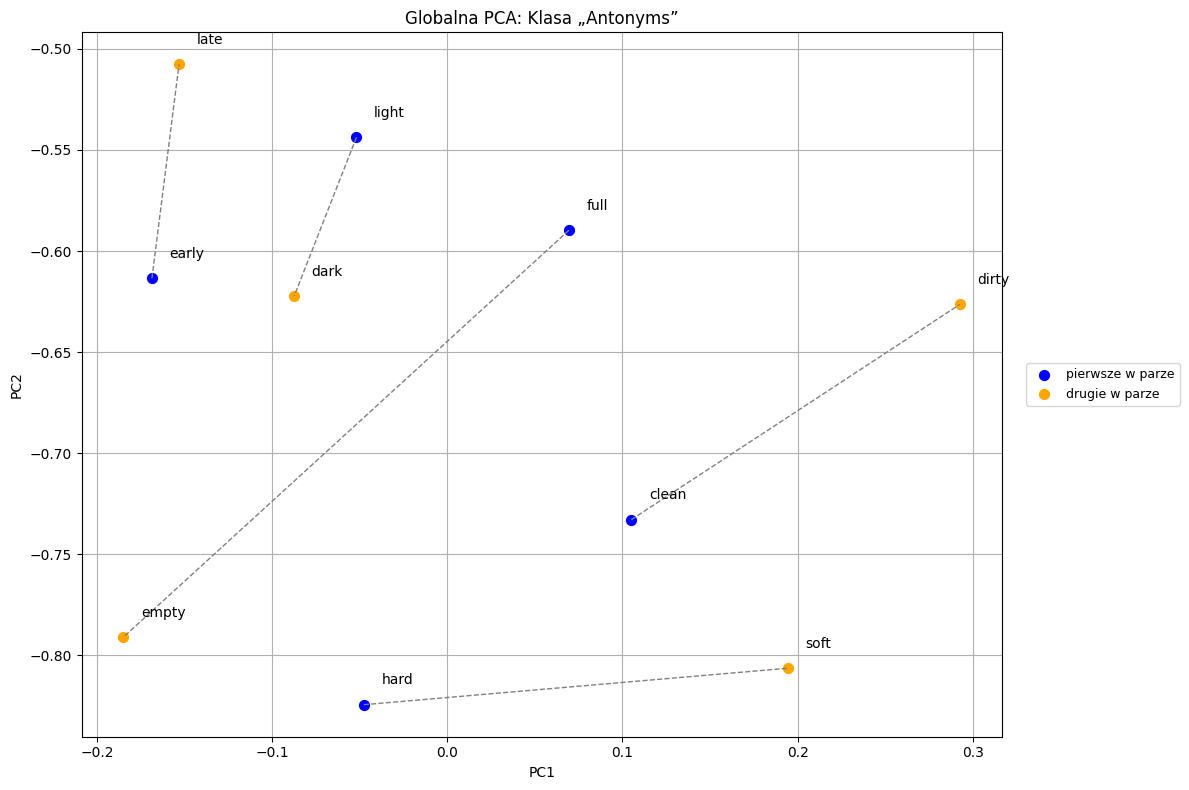

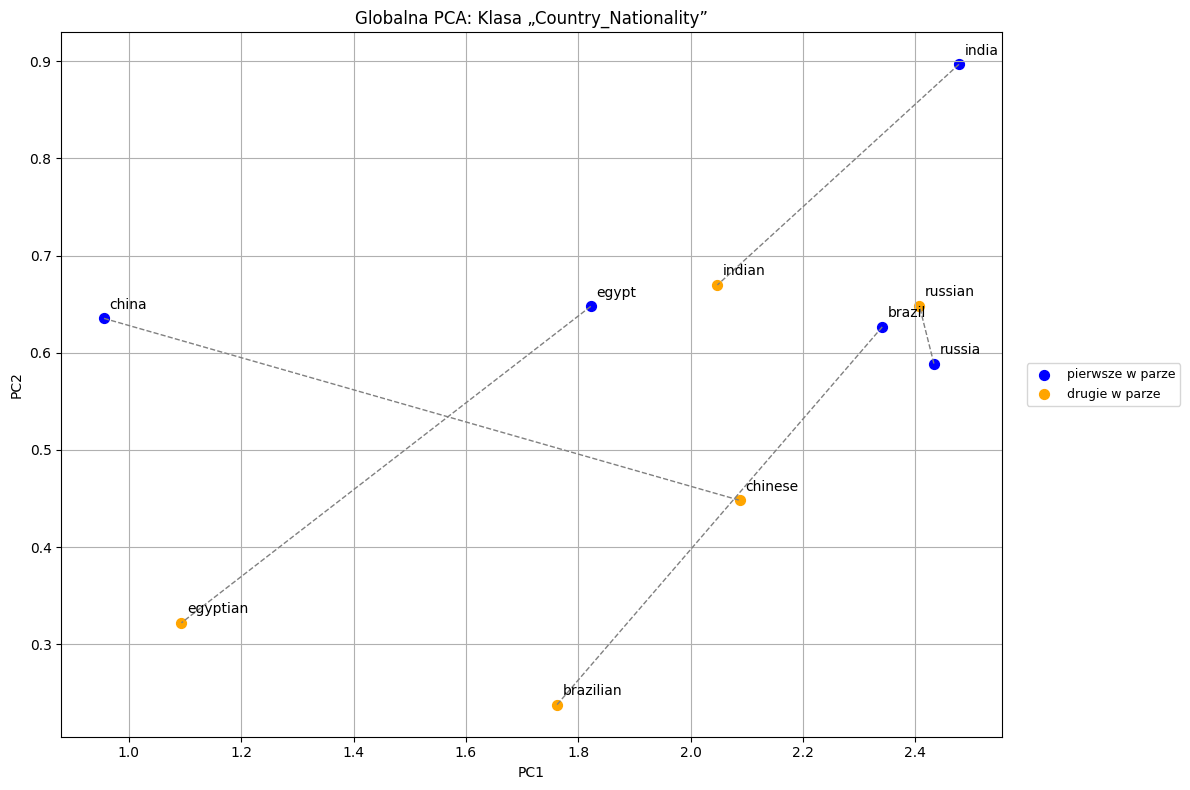

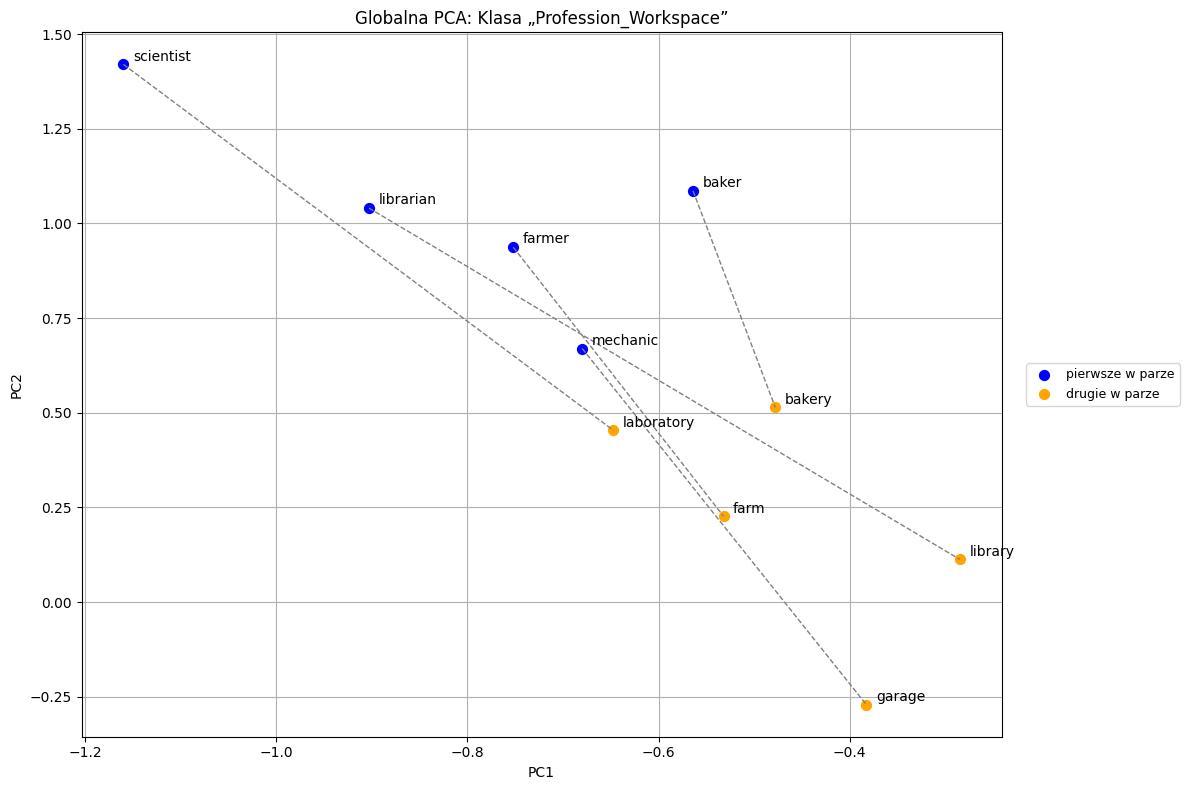

In [ ]:
# Krok 9: Dla każdej klasy – rysuj jej punkty w tej samej globalnej PCA
# Dwa kolory: pierwszy element pary = niebieski, drugi = pomarańczowy
first_color = 'blue'
second_color = 'orange'

for class_name, pairs in semantic_classes.items():
    # Zbierz tylko słowa w vocabie, zachowując strukturę par
    valid_pairs = []
    for a, b in pairs:
        a_l, b_l = a.lower(), b.lower()
        if a_l in global_coords_dict and b_l in global_coords_dict:
            valid_pairs.append((a_l, b_l))
    if len(valid_pairs) < 2:  # co najmniej dwie pary? (czyli 4 słowa) - lub zmodyfikuj warunek do <1 pary
        print(f"⚠️ Klasa {class_name}: za mało słów w słowniku, pominięte.")
        continue

    plt.figure(figsize=(12, 8))
    for a_l, b_l in valid_pairs:
        x_a, y_a = global_coords_dict[a_l]
        x_b, y_b = global_coords_dict[b_l]

        # Pierwsze słowo w parze
        plt.scatter(x_a, y_a, color=first_color, s=50, label='pierwsze w parze' if 'pierwsze w parze' not in plt.gca().get_legend_handles_labels()[1] else "")
        plt.text(x_a + 0.01, y_a + 0.01, a_l, fontsize=10)

        # Drugie słowo w parze
        plt.scatter(x_b, y_b, color=second_color, s=50, label='drugie w parze' if 'drugie w parze' not in plt.gca().get_legend_handles_labels()[1] else "")
        plt.text(x_b + 0.01, y_b + 0.01, b_l, fontsize=10)

        # Dodanie linii łączącej słowa w parze
        plt.plot([x_a, x_b], [y_a, y_b], color='gray', linestyle='--', linewidth=1)

    plt.title(f"Globalna PCA: Klasa „{class_name}”")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=9)
    plt.tight_layout()
    plt.show()


##Komentarze do wykresów Global PCA dla każdej klasy
Uwaga: w poniższych opisach "kierunkiem" będę nazywał połączenie kierunku i zwrotu wektora przejścia z pierwszego słowa w parze do drugiego, dla uproszczenia opisów.

**Gender**: Widać, że dla wszystkich par wektory mają zbliżony kierunek (wszystkie przejścia z rodzaju męskiego do żeńskiego odbywają się przez przesunięcie punktu w górę i lewo, poza parą boy-girl, dla której przejście jest praktycznie tylko w górę) i długość, co sugeruje, że różnice semantyczne między wersjami męskimi i żeńskimi są reprezentowane przez spójny kierunek w przestrzeni wektorowej.

**Verb_Tense_Past**: Niektóre pary znajdują się bardzo blisko siebie, a ponadto wektory się krzyżują, mają bardzo różne długości i kierunki. Sugeruje to, że relacja w parach nie jest jednoznacznie zakodowana w jednym kierunku przestrzeni, a PCA nie ujawnia żadnej głównej osi różnic semantycznych między członami par. Bliskość niektórych par sugeruje też, że model interpretuje część słów jako podobne tematycznie, ale niekoniecznie rozróżnia kierunek relacji.

**Singular_Plural**: Podobnie jak w przypadku klasy **Gender** większość wektorów (poza parą mouse-mice) ma zbliżoną długość i kierunek, co sugeruje, że różnice semantyczne w parach w większości tworzą spójny kierunek w przestrzeni wektorowej. Para mouse-mice potencjalnie może być mało występująca na zbiorze testowym, stąd model nie douczył się jej i traktuje ją jako osobną transformację.

**Country_Capital**: Analogicznie jak dla **Singular_Plural**, większość wektorów sugeruje spójny kierunek różnic semantycznych w przestrzeni wektorowej. Jednak pary (Austria,Vienna) oraz (Denmark, Copenhagen), co może sugerować, że te pary rzadziej występowały na zbiorze testowym, więc model jest na nich niedouczony.

**Comparative**: Tak jak w przypadku klasy **Gender**, wektory mają podobny kierunek i długość, co sugeruje, że model interpretuje różnice semantyczne w tej klasie jako spójny kierunek w przestrzeni wektorowej.

**Tool_User**: Analogicznie jak w **Comparative**.

**Animal_Baby**: Wektory par słów mają bardzo różne kierunki, prawdopodobnie więc nie istnieje jeden dominujący „wektor relacji”. Pary słów nie tworzą spójnego wymiaru semantycznego, a model widzi każdą z tych relacji jako odrębną transformację.

**Antonyms**: Analogicznie jak w **Animal_Baby**.

**Country_Nationality**: Analogicznie jak w **Animal_Baby**

**Profession_Workspace**: Wektory par słów mają podobne długości oraz kierunki, zatem model interpretuje przejście z nazwy profesji do nazwy miejsca wykonywania pracy jako spójny kierunek w przestrzeni wektorowej.







------------------------------------------------------
#5. Lokalne PCA dla każdej klasy oraz wykresy
------------------------------------------------------

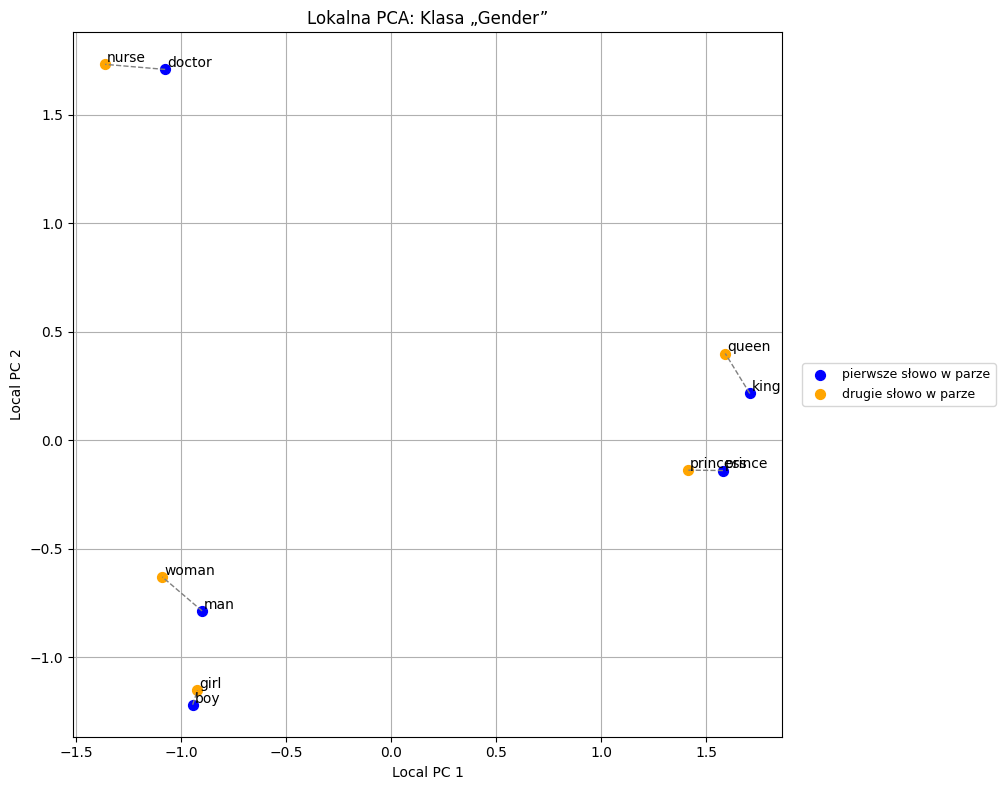

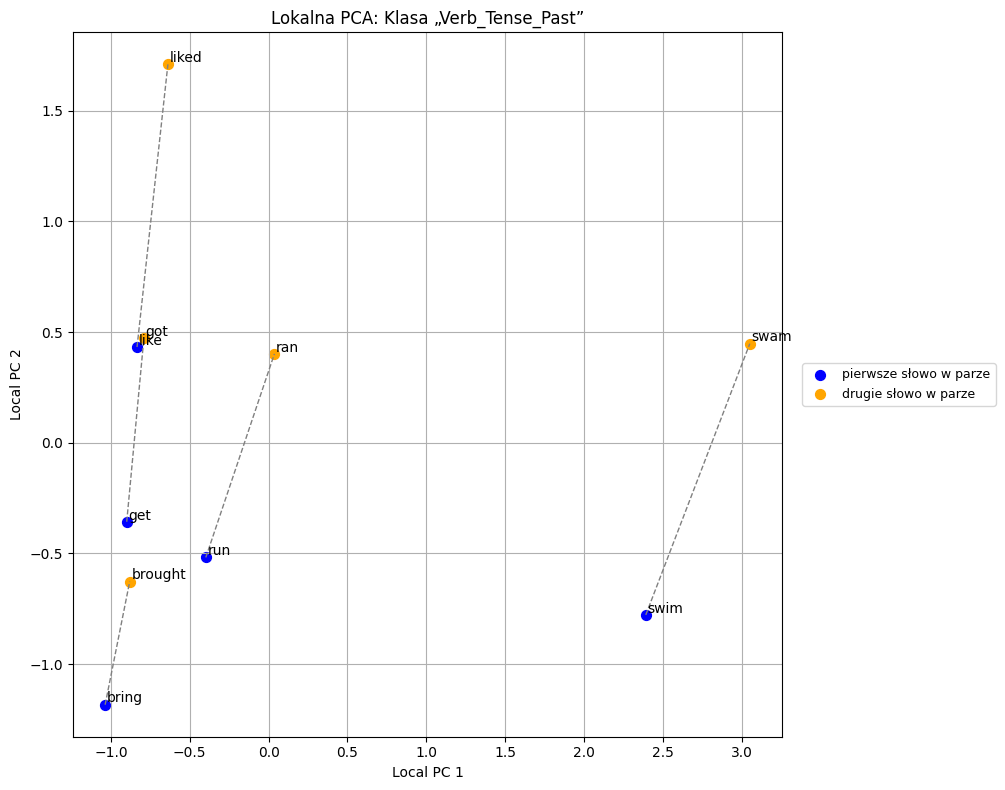

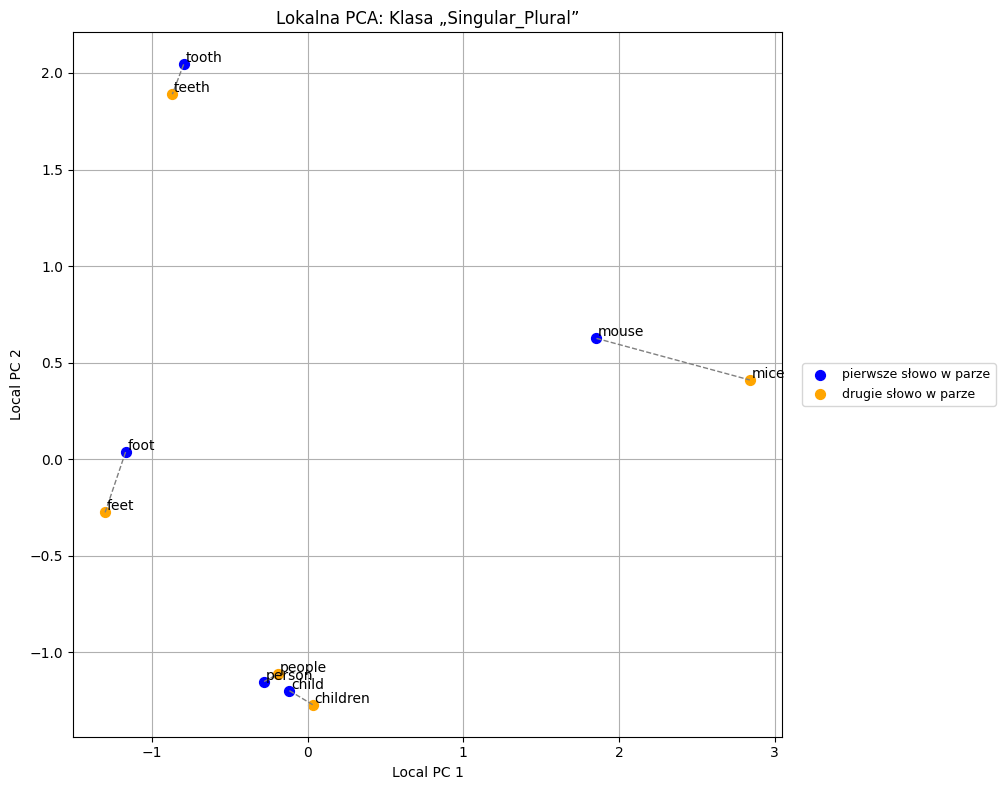

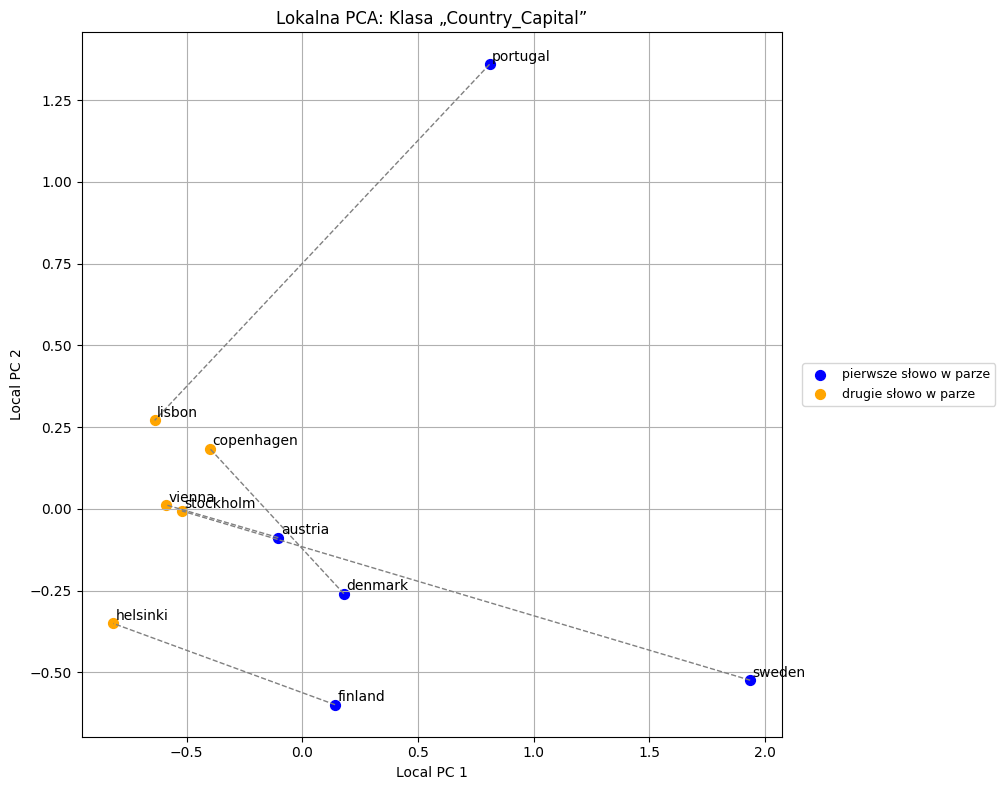

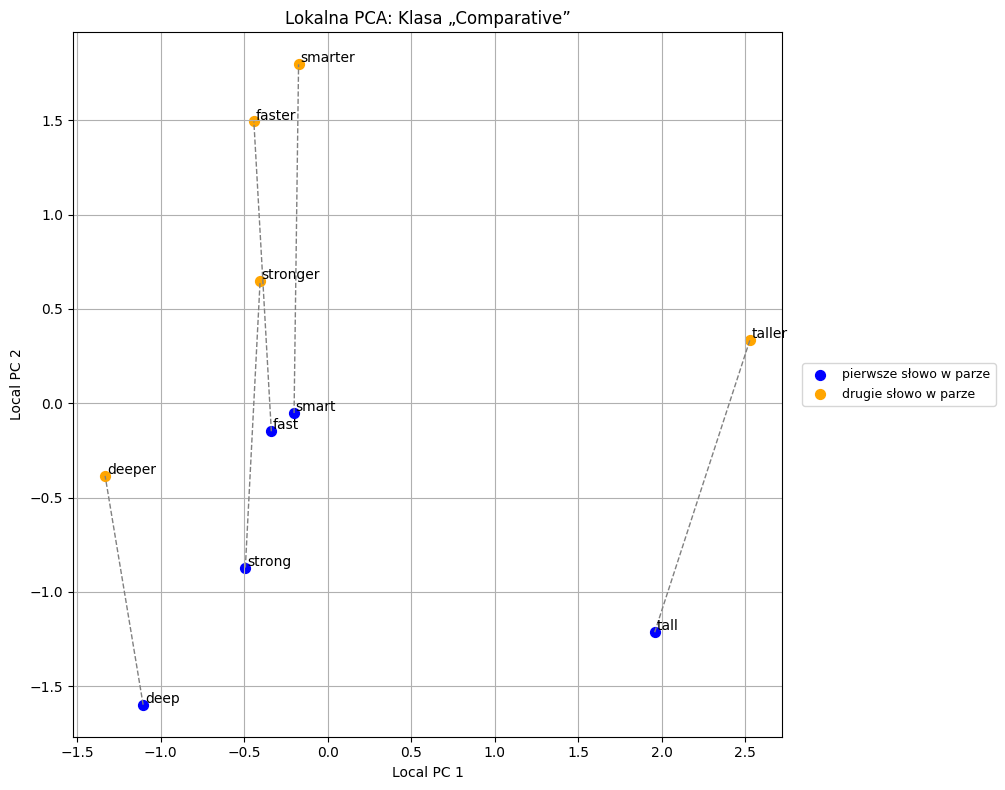

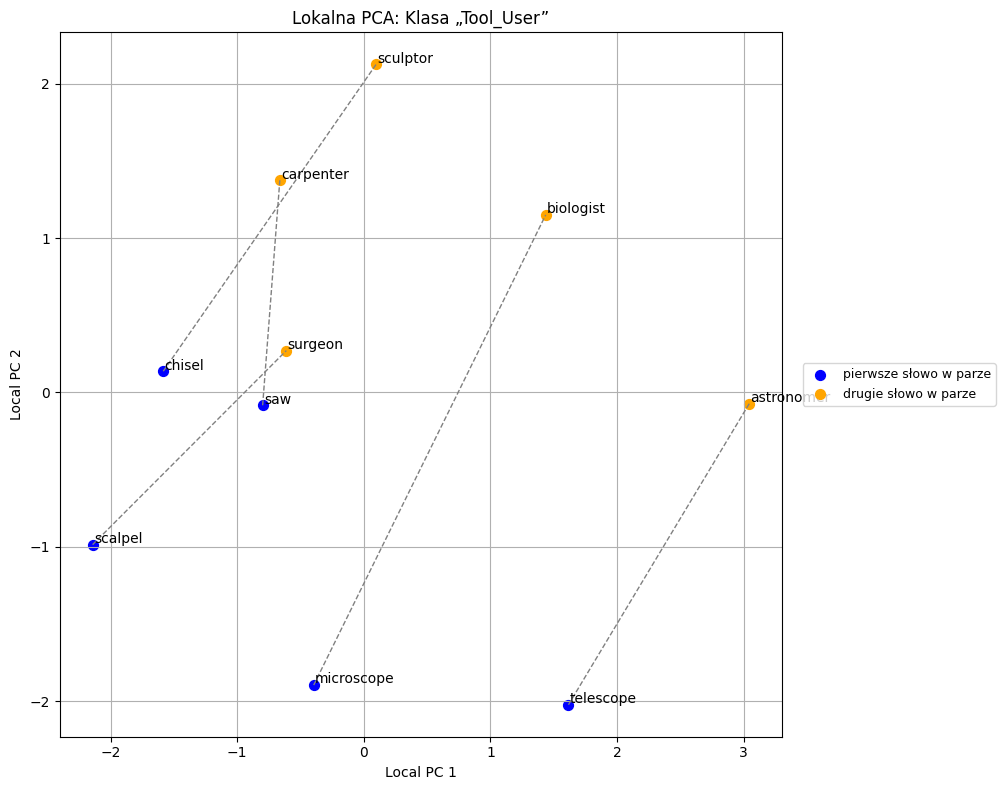

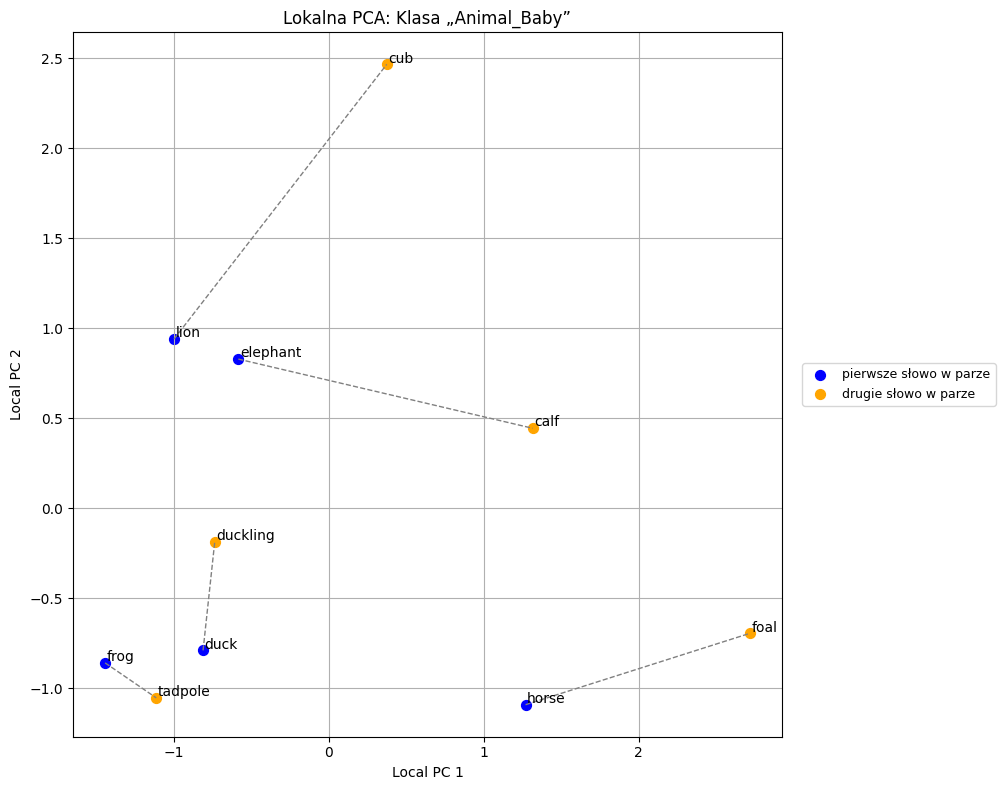

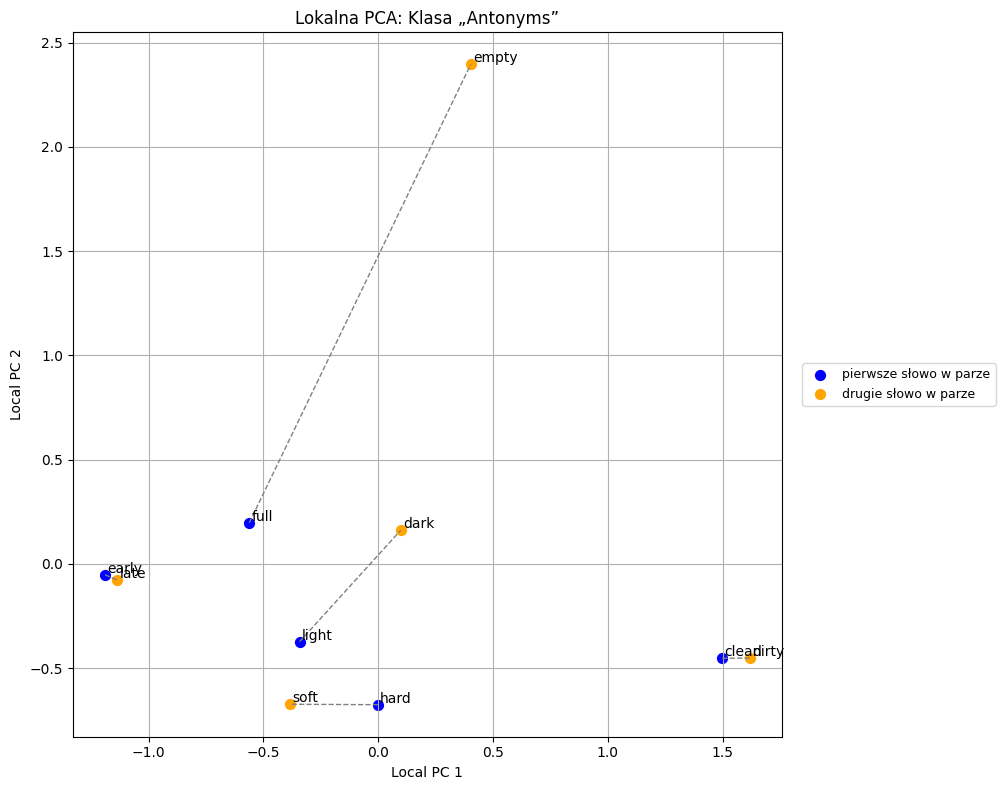

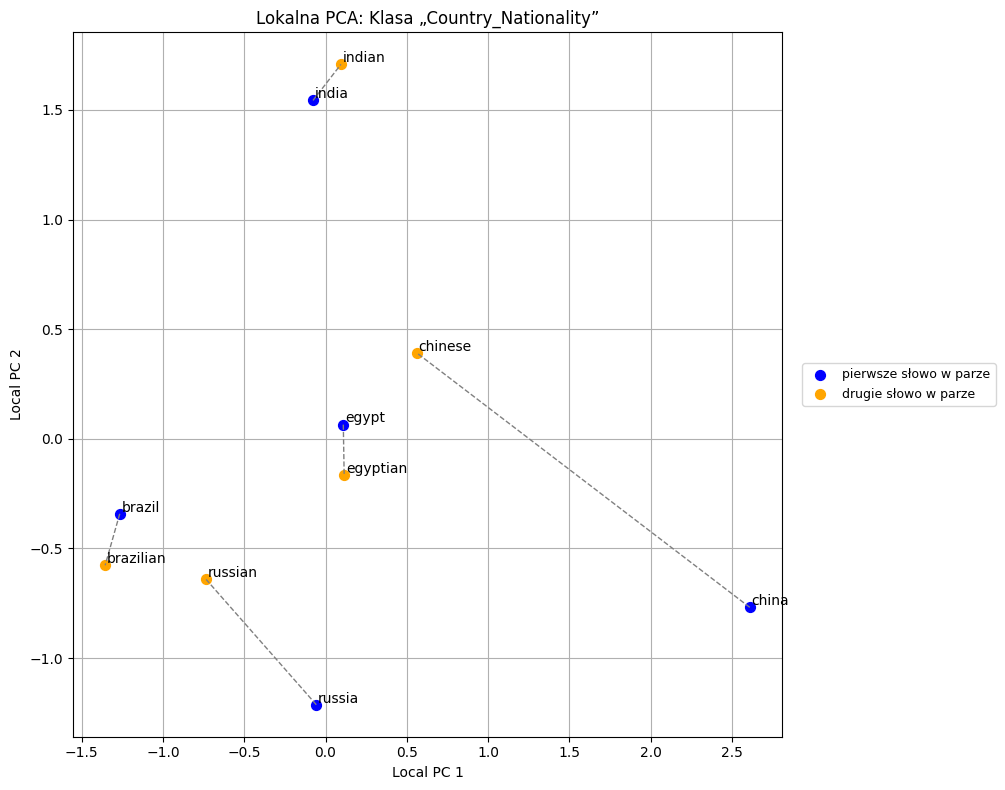

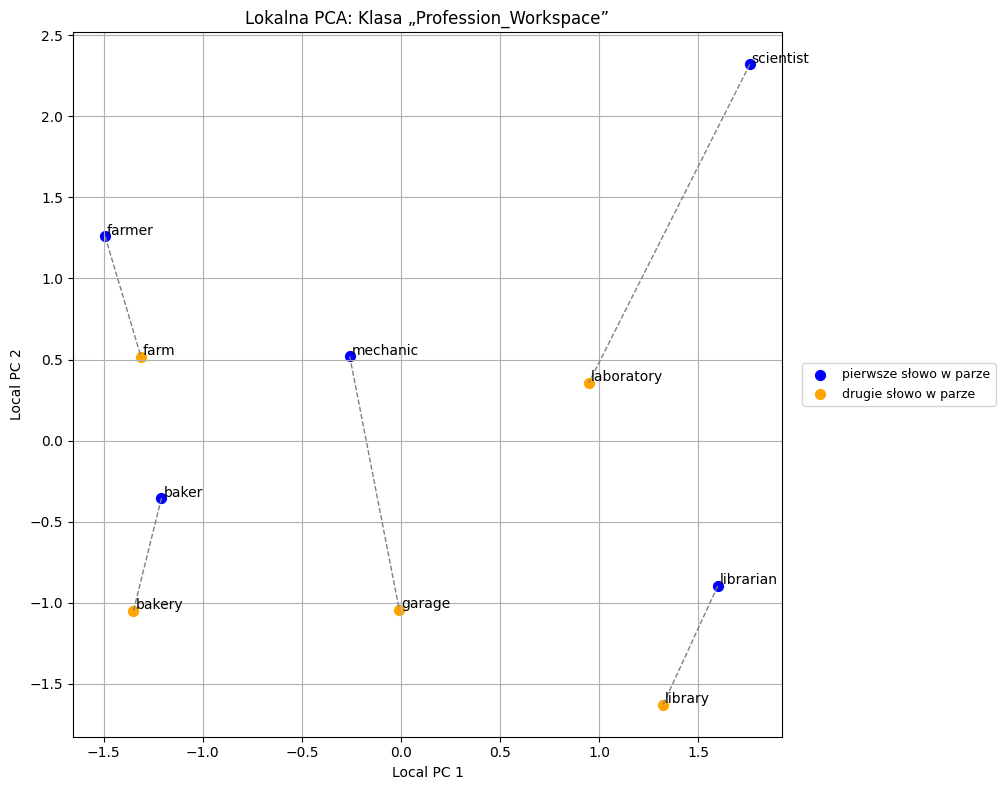

In [ ]:
# Krok 10: Lokalna PCA (osobno dla każdej klasy, tylko 10 słów)
for class_name, pairs in semantic_classes.items():
    # Zbuduj listę słów zachowując strukturę par: [a1, b1, a2, b2, ...]
    class_words = []
    for a, b in pairs:
        a_l, b_l = a.lower(), b.lower()
        if a_l in model and b_l in model:
            class_words.extend([a_l, b_l])
    if len(class_words) < 2:
        print(f"⚠️ Klasa {class_name}: za mało słów w słowniku do lokalnej PCA.")
        continue

    # Warstwa wektorów dla tej klasy, w tej samej kolejności co class_words
    class_vecs = np.array([model[w] for w in class_words])  # shape = (num_words, 300)

    # PCA lokalne
    pca_local = PCA(n_components=2)
    coords_local = pca_local.fit_transform(class_vecs)    # shape = (num_words, 2)

    plt.figure(figsize=(12, 8))
    for i, (word, (x, y)) in enumerate(zip(class_words, coords_local)):
        if i % 2 == 0:
            # parzysty indeks → pierwsze słowo w parze
            plt.scatter(x, y, color='blue', s=50, label='pierwsze słowo w parze'
                        if 'pierwsze słowo w parze' not in plt.gca().get_legend_handles_labels()[1]
                        else "")
        else:
            # nieparzysty indeks → drugie słowo w parze
            plt.scatter(x, y, color='orange', s=50, label='drugie słowo w parze'
                        if 'drugie słowo w parze' not in plt.gca().get_legend_handles_labels()[1]
                        else "")
        plt.text(x + 0.01, y + 0.01, word, fontsize=10)
    # Dodaj linie łączące punkty w parach (co dwa punkty)
    for i in range(0, len(coords_local), 2):
        x1, y1 = coords_local[i]
        x2, y2 = coords_local[i + 1]
        plt.plot([x1, x2], [y1, y2], color='gray', linestyle='--', linewidth=1)

    plt.title(f"Lokalna PCA: Klasa „{class_name}”")
    plt.xlabel("Local PC 1")
    plt.ylabel("Local PC 2")
    plt.grid(True)
    # Umieść legendę po prawej stronie
    plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=9)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

##Komentarz do wykresów lokalnego PCA dla każdej klasy
Klasy **Country_Capital**, **Comparative**, **Tool_User**, **Animal_Baby**, **Antonyms** oraz **Country_Nationality** zachowują takie same cechy wykresów wyników lokalnego PCA, jak w przypadku globalnego PCA.\
Zmianom uległy natomiast następujące klasy:

**Gender** i **Singular_Plural**: dla obu tych klas na wykresach lokalnego PCA widzimy, że wektory par słów nie są już podobnej długości ani nie mają zbliżonych kierunków. Może się tak dziać, ponieważ relacje w tych klasach są semantycznie spójne globalnie, ale lokalnie mogą być zdominowane przez inne różnice. Globalne PCA lepiej zachowuje relacje semantyczne, gdy są one wspólne dla wielu klas i szeroko reprezentowane w embeddingach, natomiast lokalne PCA może zagubić semantykę, jeśli ta relacja nie pokrywa się z największą wariancją w tej konkretnej klasie.

**Verb_Tense_Past**: dla tej klasy mamy sytuację odwrotną. Na wykresie lokalnego PCA wektory par słów mają podobne kierunki i długości, w odróżnieniu od wykresu globalnego PCA. Uzyskaliśmy taki efekt, ponieważ lokalne PCA skupia się wyłącznie na jednej klasie par, dzięki czemu może lepiej wydobyć spójną strukturę semantyczną specyficzną dla tej klasy. W efekcie relacja, która globalnie była zagłuszona, lokalnie ujawnia się jako jednolite przesunięcie o podobnym kierunku i długości.

**Profession_Workspace**: dla tej klasy zachodzi przypadek podobny do tej z klas **Gender** i **Singular_Plural**. Na wykresie lokalnego PCA mamy pogorszone wyniki w stosunku do globalnego PCA. Jednak pogorszenie to jest tak znaczne jak w przypadku dwóch wymienionych wcześniej klas, więc lokalne PCA gubi semantykę klasy w mniejszym stopniu.

##Odpowiedzi na pytania:
**1. Czy relacje wektorowe są zachowane?**  
Globalne PCA zachowuje silne, jednorodne relacje (**Gender**, **Singular_Plural**, **Comparative**, **Profession_Workspace**) jako podobne wektory, podczas gdy lokalne PCA może te relacje rozproszyć, bo skupia się na wariancji w pojedynczej klasie. Jednak dzięki skupieniu lokalnemu, może też ujawnić relacje niewidoczne w globalnym PCA, tak jak w przypadku klasy **Verb_Tense_Past**. W klasach o zróżnicowanych relacjach (**Animal_Baby**, **Antonyms**, **Country_Nationality**) żadne PCA nie wydobywa spójnego wzorca – wektory są różnych długości i mają różne kierunki.

**2. Czy PCA oddaje różnice semantyczne?**  
Generalnie nie można powiedzieć, że PCA zawsze oddaje różnice semantyczne. Co prawda w przypadku relacji silnych i jednolitych globalne PCA pokaże różnice semantyczne, tak jak widać to na przykładzie klas **Gender** i **Singular_Plural**. Jednak może ono zagłuszać pewne mniej dominujące relacje, które lokalne PCA umie lepiej uwidocznić, tak jak w przypadku klasy **Verb_Tense_Past**. Natomiast na przykładzie klas **Antonyms** oraz **Animal_Baby** widzimy, że są też przypadki relacji, których żaden z obu wymienionych rodzajów PCA nie umie uchwycić.

--------------------------------------------
#6. Embedding Arithmetic
--------------------------------------------

In [ ]:
# Krok 11: Embedding Arithmetic
# Najpierw zbieramy zestaw wszystkich oryginalnych słów (100) z semantic_classes:
original_words = {
    w.lower()
    for pairs in semantic_classes.values()
    for pair in pairs
    for w in pair
}

for class_name, pairs in semantic_classes.items():
    # Wybieramy pierwszą parę (A→B) i drugą parę (weźmy jej pierwsze słowo jako C)
    A = pairs[0][0].lower()
    B = pairs[0][1].lower()
    C = pairs[1][0].lower()

    if all(w in model for w in (A, B, C)):
        print(f"Klasa „{class_name}”: analizujemy: {B} - {A} + {C}")
        try:
            results = model.most_similar(positive=[B, C], negative=[A], topn=5)
            for neighbor, score in results:
                mark = "    (w słowniku)" if neighbor in original_words else "    (poza słownikiem)"
                print(f"   {neighbor}: {score:.4f} {mark}")
        except Exception as e:
            print(f"   ❌ Błąd podczas obliczania analogii: {e}")
    else:
        missing = [w for w in (A, B, C) if w not in model]
        print(f"Klasa „{class_name}”: pominięto (brak słów w modelu: {missing})")

Klasa „Gender”: analizujemy: queen - king + man
   woman: 0.7609     (w słowniku)
   girl: 0.6140     (w słowniku)
   teenage_girl: 0.6041     (poza słownikiem)
   teenager: 0.5826     (poza słownikiem)
   lady: 0.5753     (poza słownikiem)
Klasa „Verb_Tense_Past”: analizujemy: ran - run + swim
   swam: 0.7499     (w słowniku)
   swimming: 0.6340     (poza słownikiem)
   swum: 0.6098     (poza słownikiem)
   paddled: 0.6005     (poza słownikiem)
   swims: 0.5437     (poza słownikiem)
Klasa „Singular_Plural”: analizujemy: mice - mouse + child
   children: 0.6255     (w słowniku)
   newborns: 0.5853     (poza słownikiem)
   babies: 0.5700     (poza słownikiem)
   infant: 0.5697     (poza słownikiem)
   infants: 0.5568     (poza słownikiem)
Klasa „Country_Capital”: analizujemy: vienna - austria + sweden
   ukraine: 0.4758     (poza słownikiem)
   maxwell: 0.4683     (poza słownikiem)
   indonesia: 0.4647     (poza słownikiem)
   wiv: 0.4640     (poza słownikiem)
   rome: 0.4549     (poza 

## Odpowiedzi na pytania:

1. **Czy najbliższe słowa wynikające z arytmetyki wektorowej mają sens?**  
   Tak – w większości przypadków najbliższe słowa są semantycznie trafne i odpowiadają oczekiwanym transformacjom. Przykłady takie jak _queen - king + man → woman_ oraz _taller - tall + strong → stronger_ pokazują, że model skutecznie odwzorowuje pewne zależności.

2. **Jakie typy relacji są uchwycone, a jakie nie?**  
   Model dobrze odtwarza regularne i gramatyczne relacje, takie jak:  
   – rodzaj (**Gender**),  
   – liczba pojedyncza–mnoga (**Singular–Plural**),  
   – czas przeszły (**Verb_Tense_Past**),  
   Trudności pojawiają się przy nieregularnych lub semantycznie złożonych relacjach, np.  
   – kraj–stolica (**Country–Capital**),  
   – narzędzie–użytkownik (**Tool_User**),  
   – zwierzę–młode (**Animal_Baby**),  
   – przeciwieństwa (**Antonyms**).  
   W tych klasach odpowiedzi są mniej jednoznaczne, często nieprecyzyjne lub odbiegające od oczekiwanej kategorii.

3. **Czy niektóre klasy zachowują się lepiej niż inne?**  
   Najlepiej zachowują się klasy o prostej, regularnej strukturze morfologicznej  takie jak **Gender**, **Verb_Tense_Past**, **Singular_Plural**. Gorzej wypadają klasy z niejednoznacznymi lub encyklopedycznymi relacjami, np. **Animal_Baby**, **Antonyms** czy **Country–Capital**, gdzie model ma trudności z uogólnieniem relacji i generuje mniej trafne lub zupełnie nieprawidłowe odpowiedzi.








